# FICZON Sales Effectiveness

FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions. FicZon major leads 
generation channel is digital and through their website. 
FicZon business is majorly dependent on the sales force 
effectiveness. As the market is maturing and more new competitors 
entering the market, FicZon is experiencing the dip in sales. 
Effective sales is dependent on lead quality and as of now, this is 
based on manual categorization and highly depended on sales staff. 
Though there is a quality process, which continuously updates the 
lead categorization, it’s value is in for post analysis, rather than 
conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead 
quality and as result, expecting significant increase in sales 
effectiveness

In [1]:
!pip install sqlalchemy
!pip install pymysql
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing Necessary libaries 

In [3]:
import mysql.connector
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Connecting database

In [5]:
try:
    connection = mysql.connector.connect(
        host='18.136.157.135',
        port=3306,
        user='dm_team2',
        password='DM!$Team&27@9!20!',
        database='project_sales'
    )

    if connection.is_connected():
        print("Successfully connected to the 'project_sales' database.")
        
    cursor = connection.cursor()

    query = "SELECT * FROM data"
    cursor.execute(query)

    result = cursor.fetchall()
    columns = [column[0] for column in cursor.description] 
    data = pd.DataFrame(result, columns=columns)

    print("Data loaded successfully!")

except mysql.connector.Error as err:
    print(f"Error: {err}")

Successfully connected to the 'project_sales' database.
Data loaded successfully!


In [6]:
# Reading the data

In [7]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### Basic Checks

In [8]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [10]:
data.shape

(7422, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [12]:
data.isnull().sum() # there are no null values present in dataset 

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [13]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [14]:
data.Status.value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

In [15]:
data.Delivery_Mode.value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [16]:
data.Location.value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [17]:
data.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: count, dtype: int64

In [18]:
data.Source.value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name:

In [19]:
data.Product_ID.value_counts()

Product_ID
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [20]:
data.EMAIL.value_counts()

EMAIL
#VALUE!               1701
sXXXXXXX@gmail.com     781
aXXXXXXX@gmail.com     445
rXXXXXXX@gmail.com     342
mXXXXXXX@gmail.com     305
                      ... 
dXXXXXXXwal@bt.com       1
uXXXXXXXectric.com       1
dXXXXXXX9@gmail.co       1
pXXXXXXXamaris.com       1
mXXXXXXXengira.com       1
Name: count, Length: 883, dtype: int64

In [21]:
data[data.duplicated()]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
130,10-11-2018 20:27,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
135,10-11-2018 20:17,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open


### Preprocessing 

In [22]:
# Removing the duplicate rows 
data.drop_duplicates(inplace = True)

In [23]:
# dropping unneccesary columns 
data.drop(['Mobile','EMAIL'], axis =1, inplace = True)

In [24]:
# Replacing blank values in data by nan
data.replace('', np.nan, inplace=True)

In [25]:
data.isnull().sum()

Created           0
Product_ID       56
Source           17
Sales_Agent      23
Location         56
Delivery_Mode     0
Status            0
dtype: int64

In [26]:
# Replacing null in product_id column by mode 

In [27]:
data['Product_ID'].isnull().sum()

56

In [28]:
data['Product_ID'].value_counts()

Product_ID
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [29]:
data['Product_ID'].fillna(data['Product_ID'].mode()[0], inplace=True)

In [30]:
data['Product_ID'].isnull().sum()

0

In [31]:
# Replacing null value in source column by mode 

In [32]:
data['Source'].isnull().sum()



17

In [33]:
data['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [34]:
data['Source'].fillna(data['Source'].mode()[0], inplace=True)

In [35]:
data['Source'].isnull().sum()

0

In [36]:
# Replacing null values in sales_agent column by mode 

In [37]:
data['Sales_Agent'].isnull().sum()

23

In [38]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: count, dtype: int64

In [39]:
data['Sales_Agent'].fillna(data['Sales_Agent'].mode()[0],inplace =True)

In [40]:
data['Sales_Agent'].isnull().sum()

0

In [41]:
# Replacing null values in location column by mode 

In [42]:
data['Location'].isnull().sum()

56

In [43]:
data['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [44]:
data['Location'].fillna(data['Location'].mode()[0], inplace =True)

In [45]:
data['Location'].isnull().sum()

0

In [46]:
# handled null values in data 

In [47]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7420 entries, 0 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7420 non-null   object
 1   Product_ID     7420 non-null   object
 2   Source         7420 non-null   object
 3   Sales_Agent    7420 non-null   object
 4   Location       7420 non-null   object
 5   Delivery_Mode  7420 non-null   object
 6   Status         7420 non-null   object
dtypes: object(7)
memory usage: 463.8+ KB


### Basic Feature Engineering 

In [49]:
# Extracting features like day,month,year,hour,min from created column 

In [50]:
data.Created.value_counts()

Created
26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
29-08-2018 15:54    1
28-04-2018 07:54    1
Name: count, Length: 6752, dtype: int64

In [51]:
data['Created'] = pd.to_datetime(data['Created'], format='%d-%m-%Y %H:%M', errors='coerce')

In [52]:
data['Year'] = data['Created'].dt.year        
data['Month'] = data['Created'].dt.month     
data['Day'] = data['Created'].dt.day          
data['Hour'] = data['Created'].dt.hour        
data['Minute'] = data['Created'].dt.minute    

In [53]:
data.drop(['Created'], axis =1 , inplace = True)

In [54]:
data.Year.value_counts()  # year column has only 2018 year so we will drop it 

Year
2018    7420
Name: count, dtype: int64

In [55]:
data.drop(['Year'],axis =1, inplace = True)

In [56]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,Open,11,14,10,5
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,Open,11,14,9,22
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,Open,11,14,9,21
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,Open,11,14,8,46
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,Open,11,14,7,34
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST,4,28,9,45
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST,4,28,9,43
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding,4,28,9,20
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,4,28,8,4


In [57]:
# Grouping values in status column into low potential and high potential 

In [58]:
data.Status.value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: count, dtype: int64

In [59]:
lead_status_mapping = {
    'CONVERTED': 'High Potential',
    'converted': 'High Potential',
    'In Progress Positive': 'High Potential',
    'Potential': 'High Potential',
    'Long Term': 'High Potential',
    'Junk Lead': 'Low Potential',
    'Not Responding': 'Low Potential',
    'Just Enquiry': 'Low Potential',
    'In Progress Negative': 'Low Potential',
    'LOST': 'Low Potential',
    'Open': 'Low Potential'
}

data['Status'] = data['Status'].map(lead_status_mapping)

In [60]:
# values after grouping 
data.Status.value_counts()

Status
Low Potential     4571
High Potential    2849
Name: count, dtype: int64

In [61]:
# Grouping values in source column into livechat, direct interaction,vdigital channel and others

In [62]:
data.Source.value_counts()  

Source
Call                             2564
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [63]:
data['Source'].replace(
    ['Live Chat-Direct', 'Live Chat-Google Organic', 'Live Chat -PPC', 'Live Chat-Blog', 
     'Live Chat-CPC', 'Live Chat-Google Ads', 'Live Chat-Adwords Remarketing', 'Live Chat-Quora', 
     'Live Chat-Youtube', 'Live Chat-Justdial'],
    'Live Chat', inplace=True)

data['Source'].replace(
    ['US Website', 'Website', 'Just Dial'], 'Website', inplace=True)

data['Source'].replace(
    ['By Recommendation'], 'Customer Referral', inplace=True)

data['Source'].replace(
    ['Existing Client', 'Personal Contact', 'Live Chat-CPC', 'CRM form', 'Existing Customer'], 
    'Existing Customer', inplace=True)

data['Source'].replace(
    ['Campaign', 'E-mail Campaign', 'SMS Campaign', 'E-Mail Message'], 
    'Campaign', inplace=True)

In [64]:
# values after grouping 
data.Source.value_counts()

Source
Live Chat            2677
Call                 2564
Website              1785
Customer Referral     212
Existing Customer     146
Campaign               34
Other                   2
Name: count, dtype: int64

In [65]:
# Grouping values in location column into international, other locations and some indian locations

In [66]:
data.Location.value_counts() 

Location
Other Locations    2556
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [67]:
def group_by_geography(location):
    if location in ['Bangalore', 'Chennai', 'Hyderabad', 'Mumbai', 'Delhi', 'Pune', 'Kolkata', 'Trivandrum','Howrah']:
         return location 
    if location in ['UAE', 'USA', 'AUSTRALIA', 'UK', 'Singapore', 'EUROPE','Malaysia']:
        return "International"
    else:
        return "Other Locations"

data['Location'] = data['Location'].apply(group_by_geography)

In [68]:
# values after grouping 
data.Location.value_counts()

Location
Other Locations    2556
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
International       214
Pune                142
Trivandrum           58
Kolkata              55
Howrah                1
Name: count, dtype: int64

In [69]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,Low Potential,11,14,10,5
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,9,22
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,9,21
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,8,46
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,7,34
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Low Potential,4,28,9,45
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Low Potential,4,28,9,43
7419,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Low Potential,4,28,9,20
7420,21,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Low Potential,4,28,8,4


In [70]:
# Handling outliers

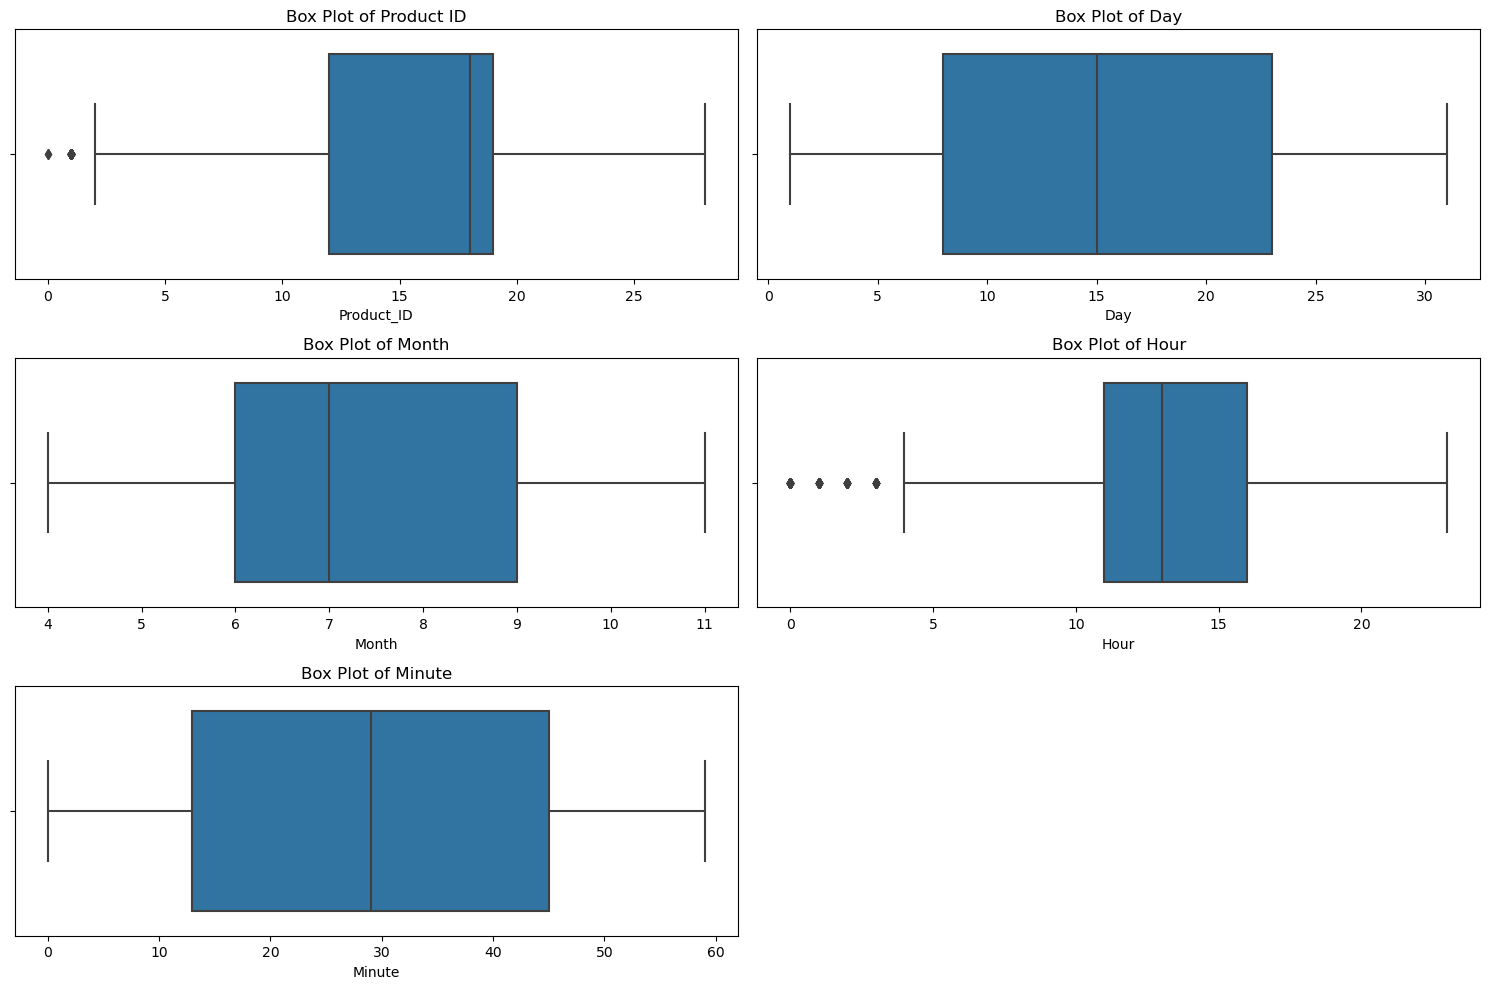

In [71]:
data['Product_ID'] = pd.to_numeric(data['Product_ID'], errors='coerce')
data['Day'] = pd.to_numeric(data['Day'], errors='coerce')
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['Hour'] = pd.to_numeric(data['Hour'], errors='coerce')
data['Minute'] = pd.to_numeric(data['Minute'], errors='coerce')

fig, axes = plt.subplots(3, 2, figsize=(15, 10))


sns.boxplot(x='Product_ID', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Product ID')

sns.boxplot(x='Day', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Day')

sns.boxplot(x='Month', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Month')

sns.boxplot(x='Hour', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Hour')

sns.boxplot(x='Minute', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Box Plot of Minute')

plt.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()


In [72]:
# Product_ID column 

In [73]:
q1 = data['Product_ID'].quantile(0.25)
q3 = data['Product_ID'].quantile(0.75)
IQR = q3 - q1 

In [74]:
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)

In [75]:
data[data['Product_ID']<lower]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute
272,1,Website,Sales-Agent-3,Bangalore,Mode-1,Low Potential,11,5,16,42
275,1,Live Chat,Sales-Agent-9,Chennai,Mode-3,Low Potential,11,5,15,41
423,1,Live Chat,Sales-Agent-3,Pune,Mode-3,Low Potential,10,31,10,43
454,1,Call,Sales-Agent-11,Other Locations,Mode-5,Low Potential,10,30,11,6
581,1,Live Chat,Sales-Agent-5,Hyderabad,Mode-3,High Potential,10,26,11,17
...,...,...,...,...,...,...,...,...,...,...
7112,1,Website,Sales-Agent-3,Chennai,Mode-1,Low Potential,5,5,10,34
7138,1,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Low Potential,5,4,16,55
7151,1,Live Chat,Sales-Agent-2,Chennai,Mode-1,Low Potential,5,4,11,45
7283,1,Call,Sales-Agent-11,Other Locations,Mode-5,Low Potential,5,2,10,8


In [76]:
data[data['Product_ID']>upper]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute


In [77]:
data.loc[data['Product_ID'] < lower,'Product_ID'] = data['Product_ID'].median()

In [78]:
data[data['Product_ID']<lower]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute


In [79]:
# Hour Column 

In [80]:
q1 = data['Hour'].quantile(0.25)
q3 = data['Hour'].quantile(0.75)
IQR = q3 - q1 

In [81]:
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)

In [82]:
data[data['Hour']<lower]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute
12,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,2,37
159,15,Website,Sales-Agent-7,Pune,Mode-5,High Potential,11,10,0,11
253,9,Website,Sales-Agent-7,Delhi,Mode-3,Low Potential,11,7,2,7
261,18,Website,Sales-Agent-7,Kolkata,Mode-3,Low Potential,11,6,0,46
305,27,Website,Sales-Agent-3,Other Locations,Mode-5,Low Potential,11,4,2,5
...,...,...,...,...,...,...,...,...,...,...
7172,5,Website,Sales-Agent-11,Chennai,Mode-1,High Potential,5,4,0,38
7220,15,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Low Potential,5,3,0,41
7305,19,Website,Sales-Agent-9,Other Locations,Mode-1,Low Potential,5,1,3,47
7306,9,Live Chat,Sales-Agent-11,Mumbai,Mode-1,Low Potential,5,1,1,15


In [83]:
data[data['Hour']>upper]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute


In [84]:
data.loc[data['Hour']<lower , 'Hour'] = data['Hour'].median()

In [85]:
data[data['Hour']<lower]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute


### EDA

In [86]:
# Univariate analysis

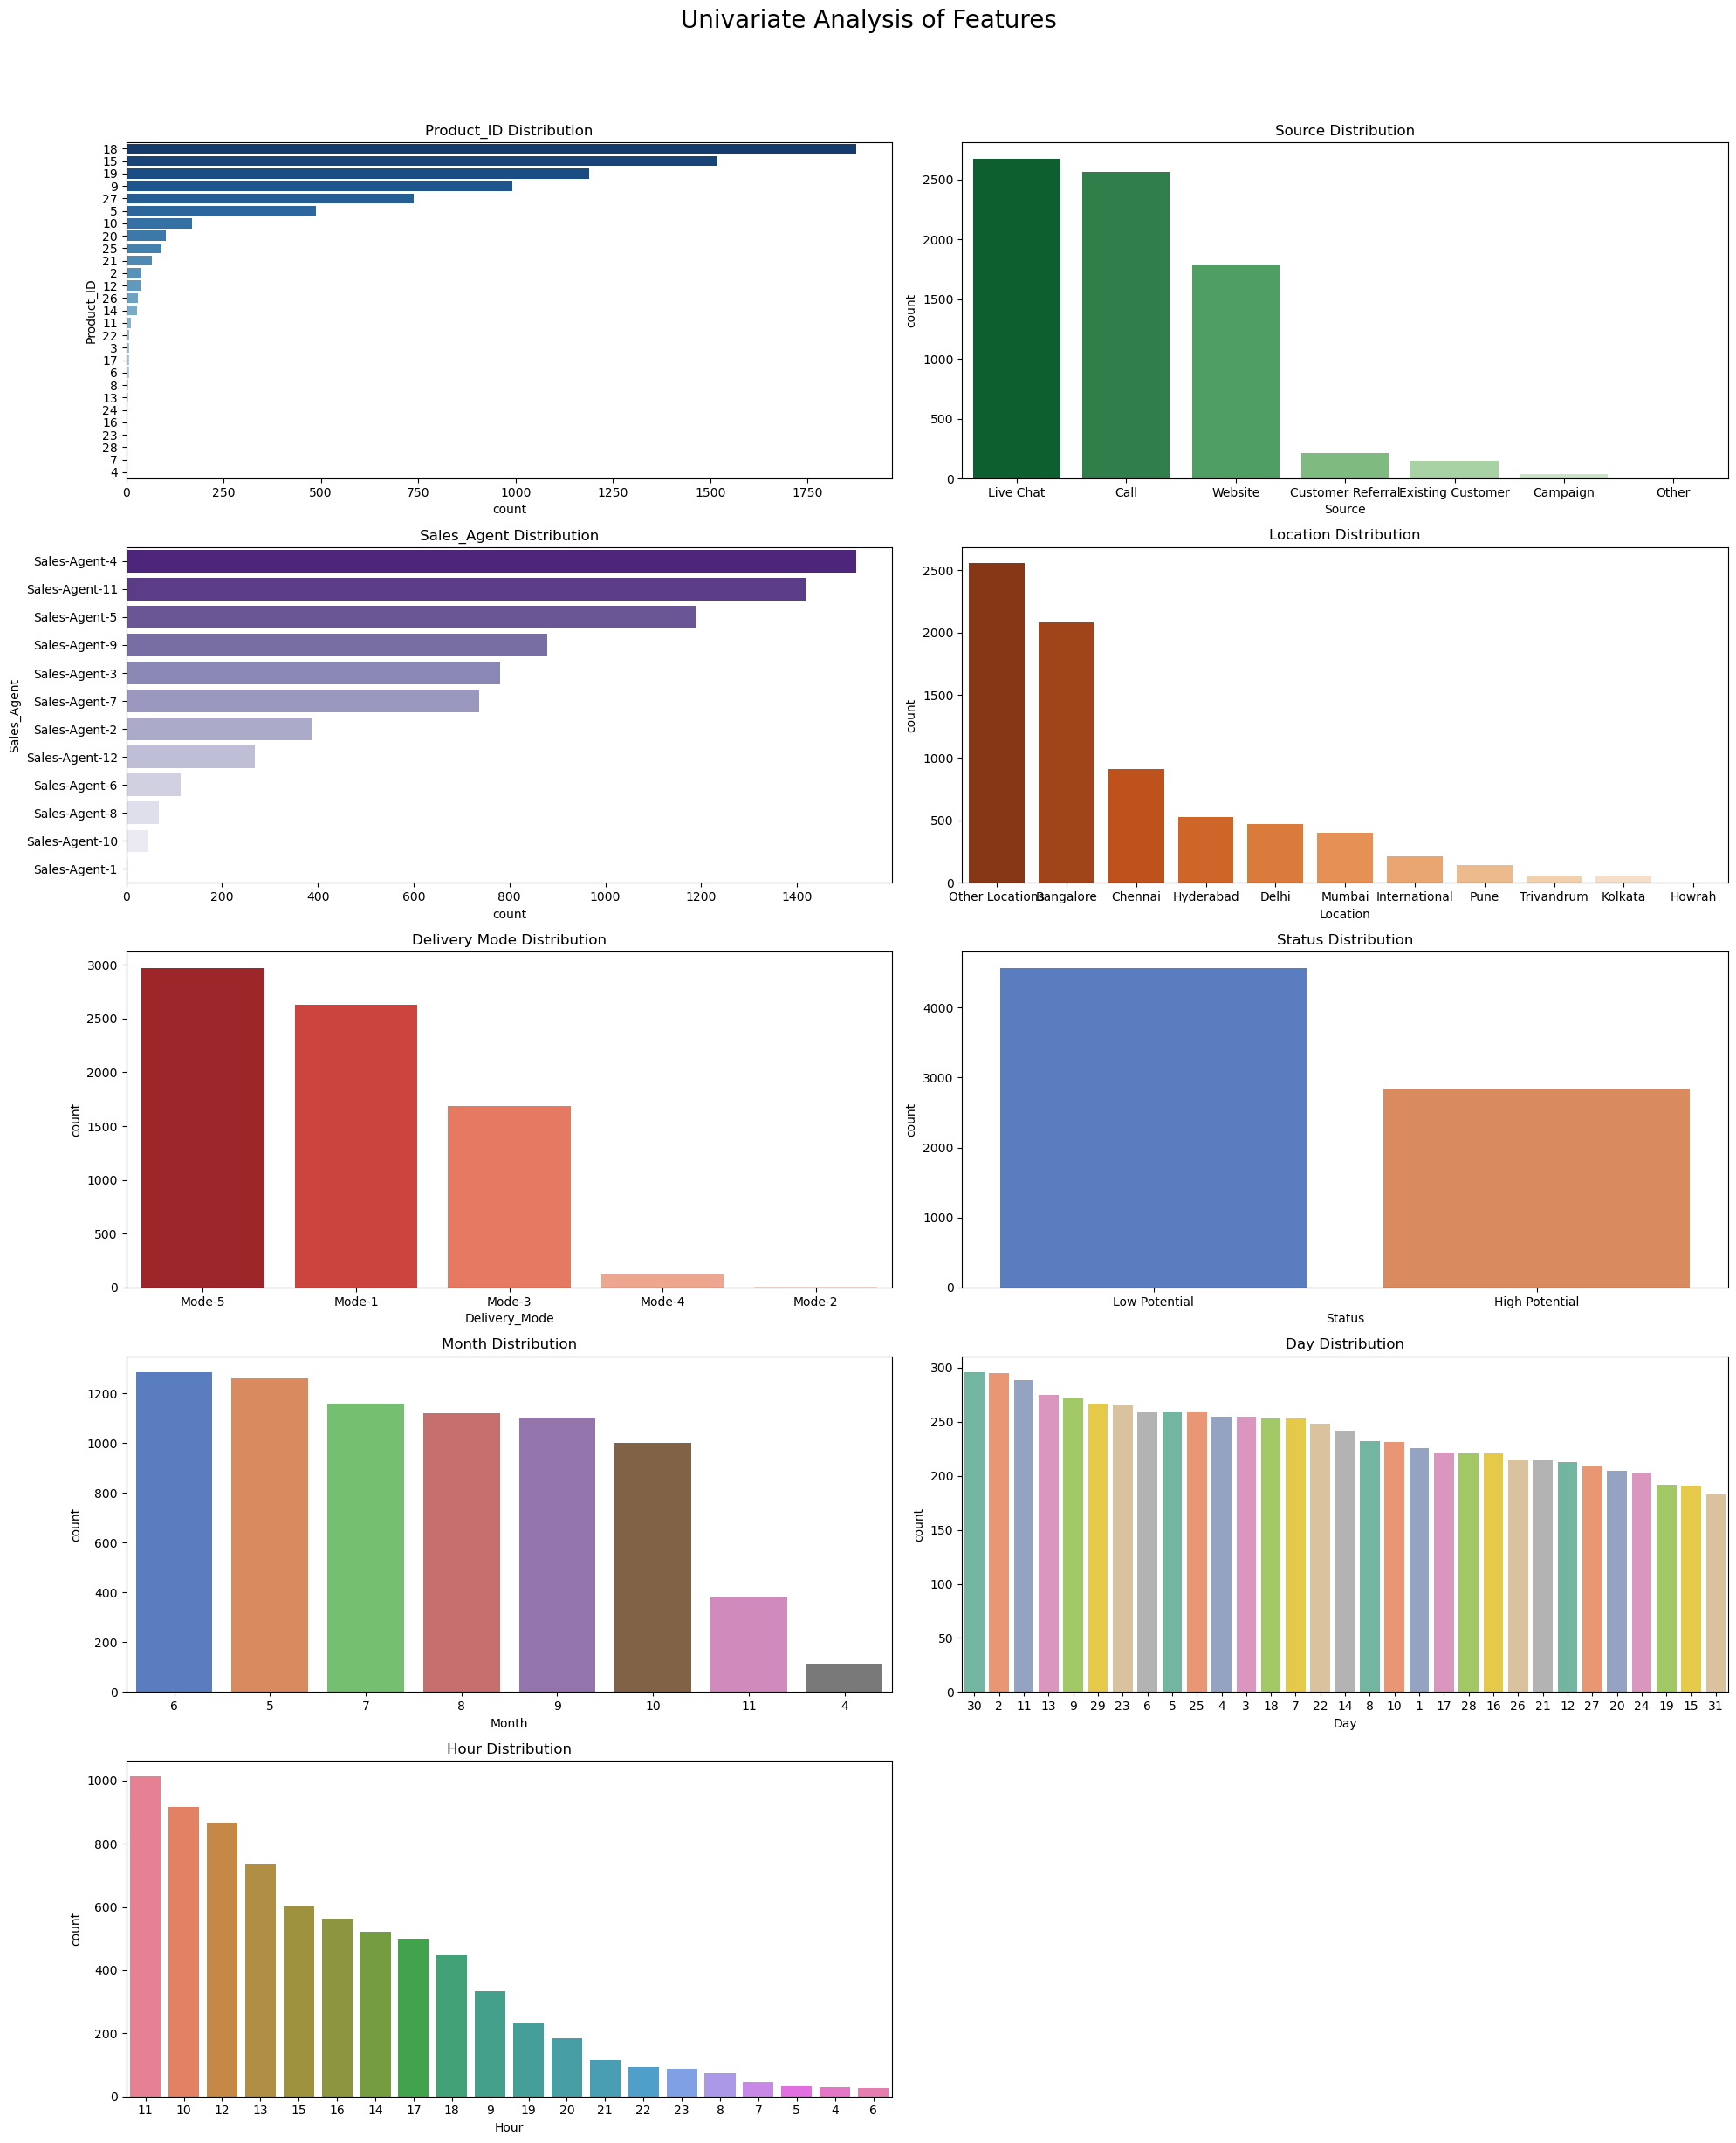

In [87]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
fig.suptitle('Univariate Analysis of Features', fontsize=20)

sns.countplot(data=data, y='Product_ID', ax=axes[0, 0], palette='Blues_r', order=data['Product_ID'].value_counts().index)
axes[0, 0].set_title('Product_ID Distribution')

sns.countplot(data=data, x='Source', ax=axes[0, 1], palette='Greens_r', order=data['Source'].value_counts().index)
axes[0, 1].set_title('Source Distribution')

sns.countplot(data=data, y='Sales_Agent', ax=axes[1, 0], palette='Purples_r', order=data['Sales_Agent'].value_counts().index)
axes[1, 0].set_title('Sales_Agent Distribution')

sns.countplot(data=data, x='Location', ax=axes[1, 1], palette='Oranges_r', order=data['Location'].value_counts().index)
axes[1, 1].set_title('Location Distribution')

sns.countplot(data=data, x='Delivery_Mode', ax=axes[2, 0], palette='Reds_r', order=data['Delivery_Mode'].value_counts().index)
axes[2, 0].set_title('Delivery Mode Distribution')

sns.countplot(data=data, x='Status', ax=axes[2, 1], palette='muted', order=data['Status'].value_counts().index)
axes[2, 1].set_title('Status Distribution')

sns.countplot(data=data, x='Month', ax=axes[3, 0], palette='muted', order=data['Month'].value_counts().index)
axes[3, 0].set_title('Month Distribution')

sns.countplot(data=data, x='Day', ax=axes[3, 1], palette='Set2', order=data['Day'].value_counts().index)
axes[3, 1].set_title('Day Distribution')

sns.countplot(data=data, x='Hour', ax=axes[4, 0], palette='husl', order=data['Hour'].value_counts().index)
axes[4, 0].set_title('Hour Distribution')

fig.delaxes(axes[4, 1])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<Axes: xlabel='Day', ylabel='Count'>

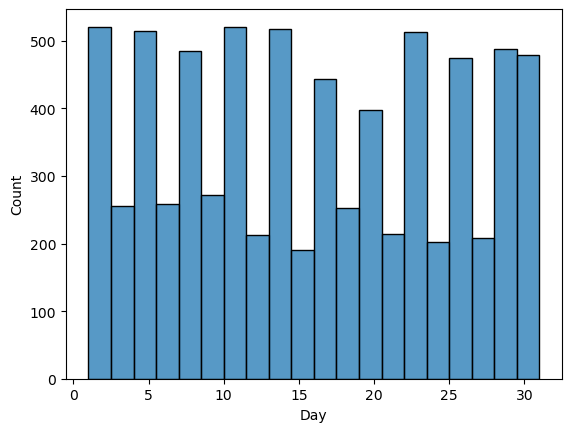

In [88]:
sns.histplot(data=data, x='Day')

<Axes: xlabel='Month', ylabel='Count'>

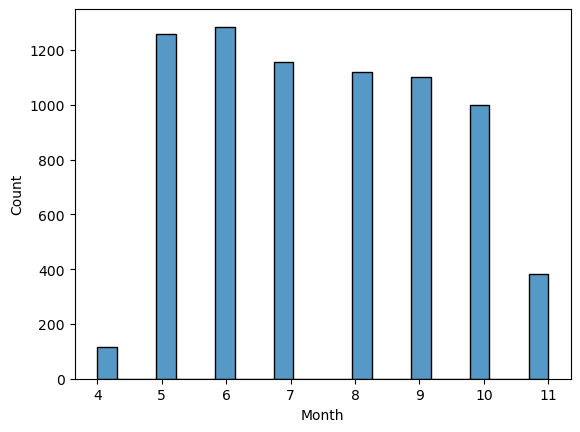

In [89]:
sns.histplot(data=data, x='Month')

<Axes: xlabel='Hour', ylabel='Count'>

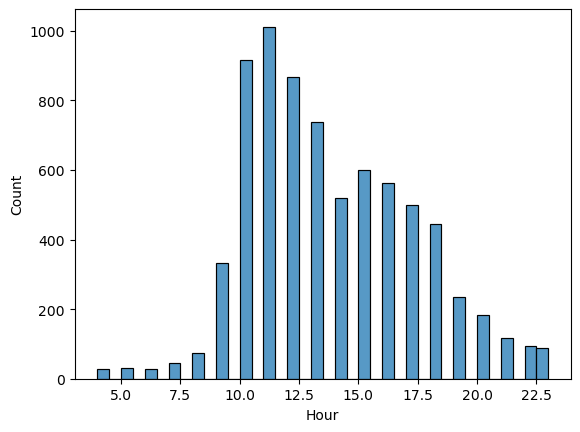

In [90]:
sns.histplot(data=data, x='Hour')

In [91]:
# bivariate analysis

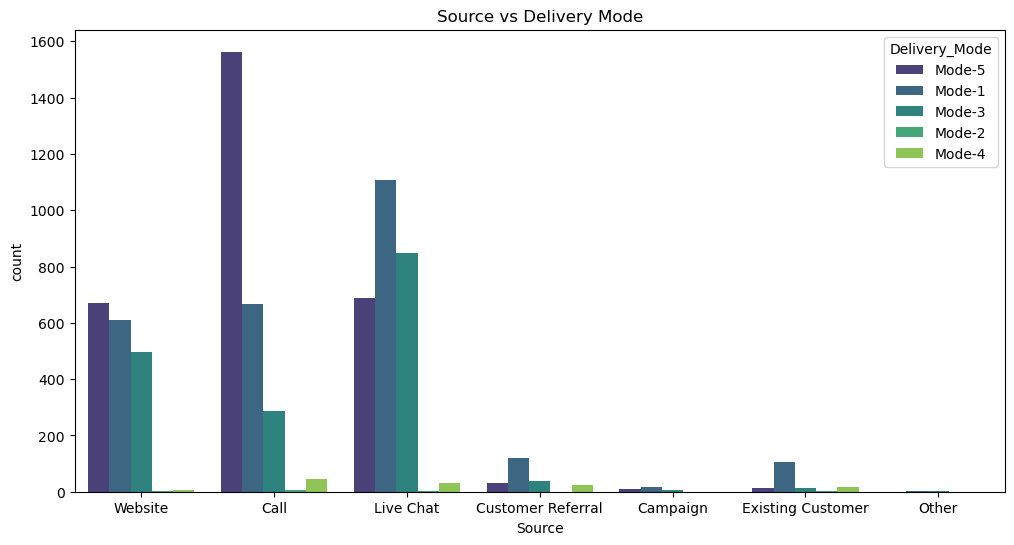

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Source', hue='Delivery_Mode', palette='viridis')
plt.title('Source vs Delivery Mode')
plt.show()

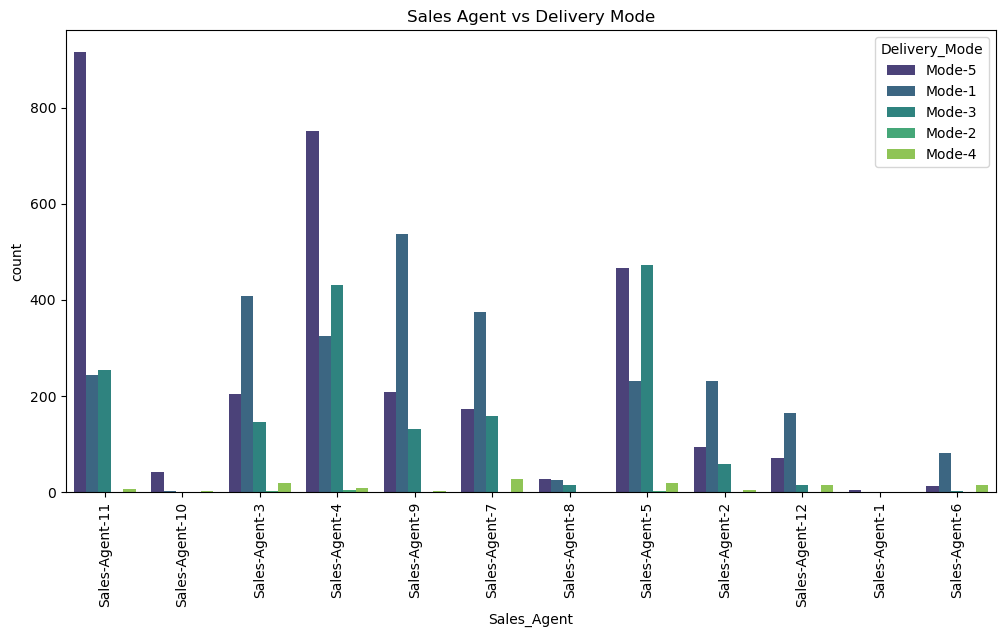

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Sales_Agent', hue='Delivery_Mode', palette='viridis')
plt.title('Sales Agent vs Delivery Mode')
plt.xticks(rotation = 90)
plt.show()

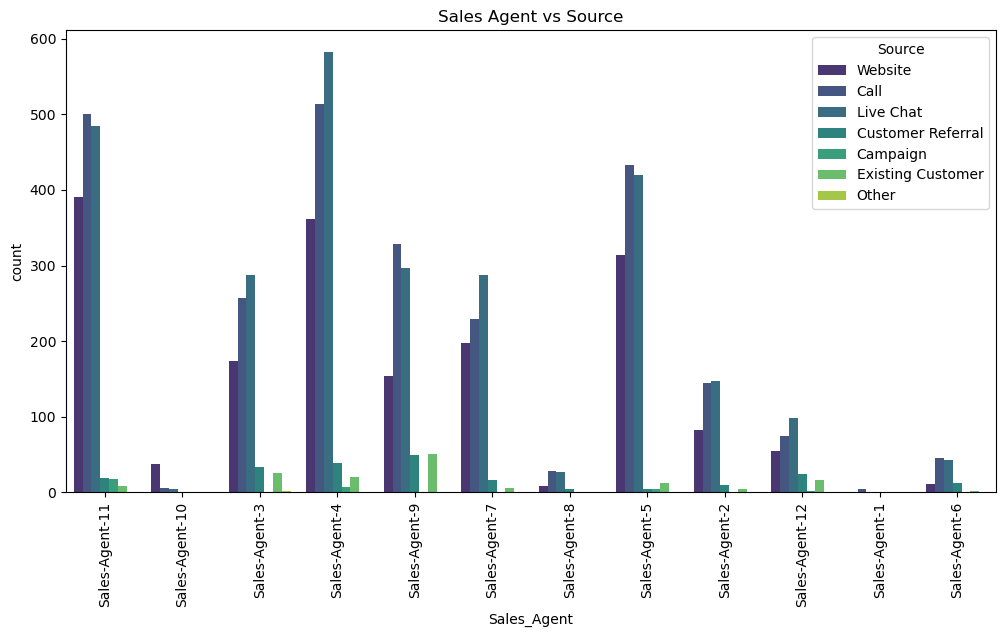

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Sales_Agent', hue='Source', palette='viridis')
plt.title('Sales Agent vs Source')
plt.xticks(rotation = 90)
plt.show()

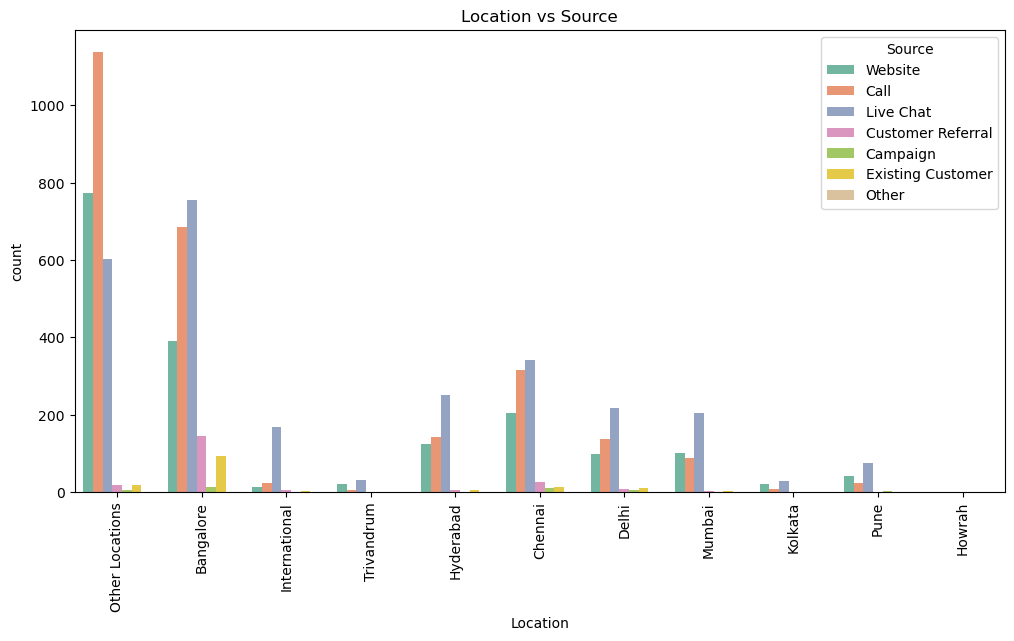

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Location', hue='Source', palette='Set2')
plt.title('Location vs Source')
plt.xticks(rotation=90)
plt.show()

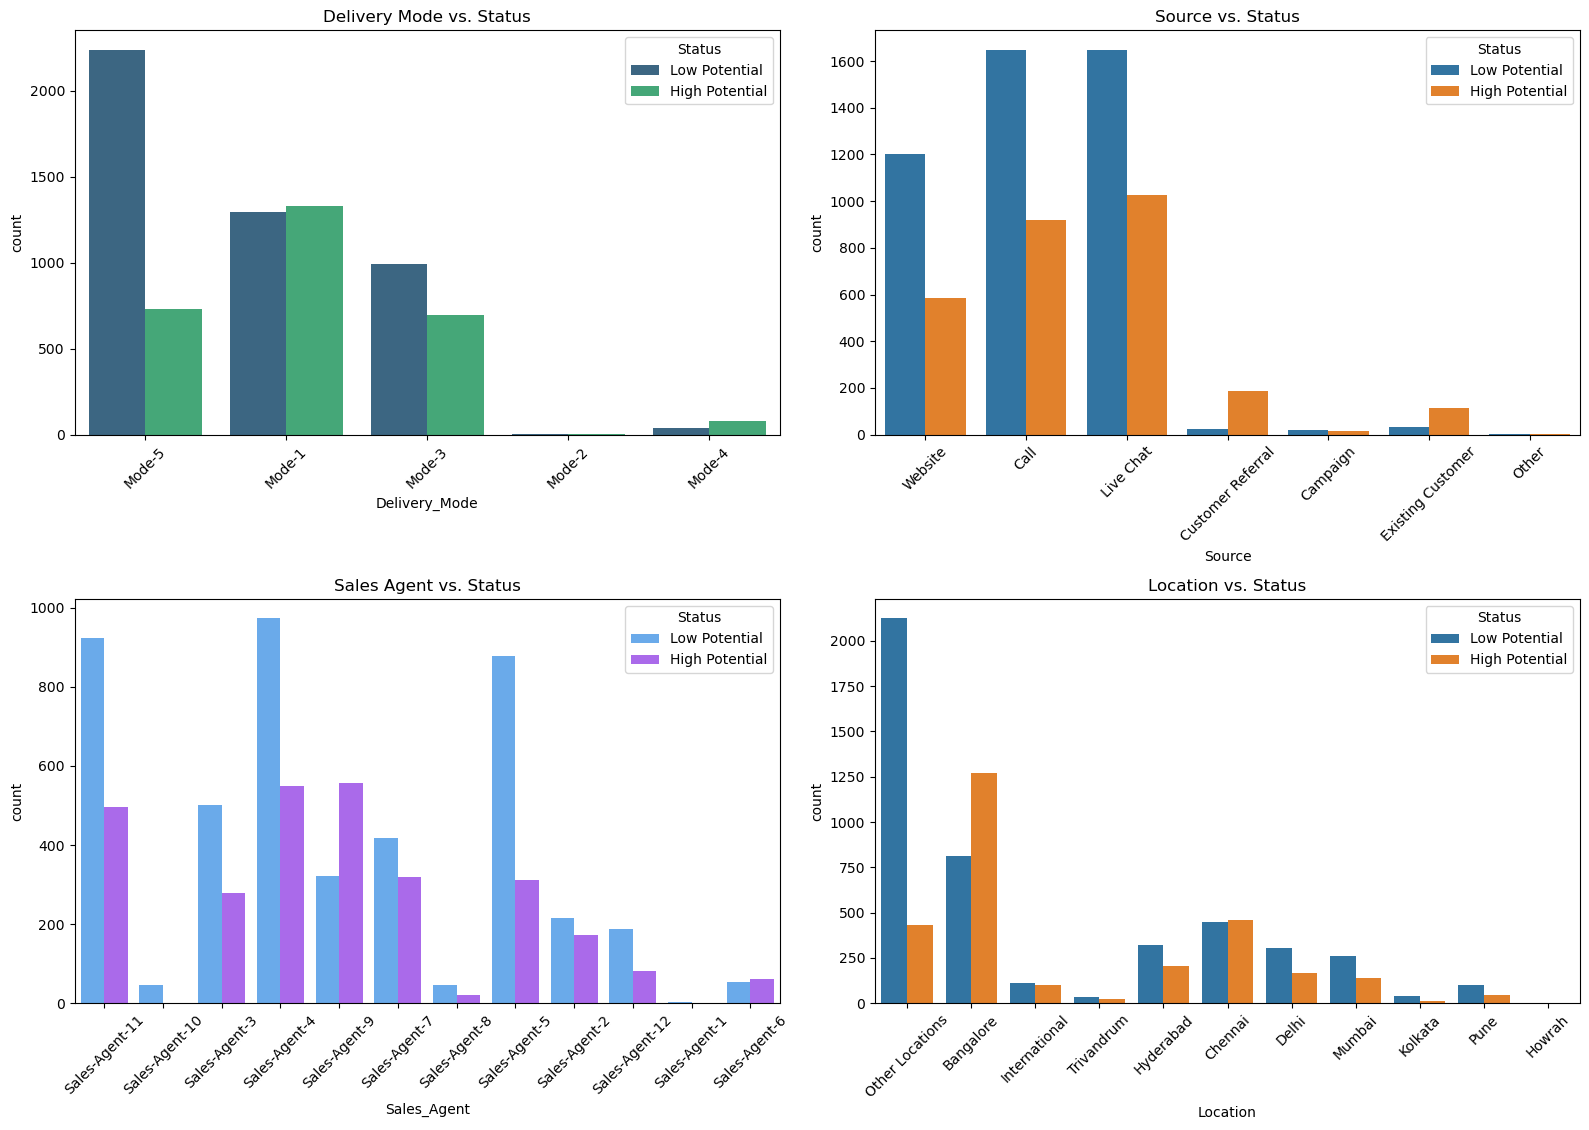

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 

sns.countplot(data=data, x='Delivery_Mode', hue='Status', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Delivery Mode vs. Status')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='Source', hue='Status', palette='tab10', ax=axes[0, 1])
axes[0, 1].set_title('Source vs. Status')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='Sales_Agent', hue='Status', palette='cool', ax=axes[1, 0])
axes[1, 0].set_title('Sales Agent vs. Status')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='Location', hue='Status', palette='tab10', ax=axes[1, 1])
axes[1, 1].set_title('Location vs. Status')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

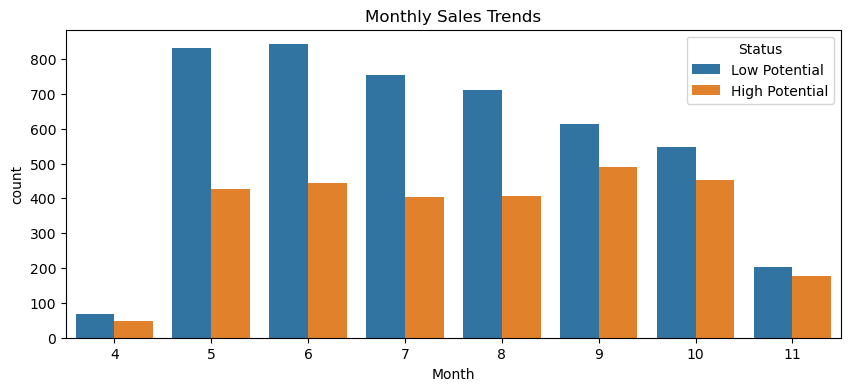

In [97]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Month', hue='Status')
plt.title('Monthly Sales Trends')
plt.show()  


### Feature Engineering

In [98]:
data['Status'] = data['Status'].map({'High Potential': 1, 'Low Potential': 0})


In [99]:
data['Status'].value_counts()

Status
0    4571
1    2849
Name: count, dtype: int64

In [100]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: count, dtype: int64

In [101]:
sales_agent_mapping = {
    'Sales-Agent-4': 0,
    'Sales-Agent-11': 1,
    'Sales-Agent-5': 2,
    'Sales-Agent-9': 3,
    'Sales-Agent-3': 4,
    'Sales-Agent-7': 5,
    'Sales-Agent-2': 6,
    'Sales-Agent-12': 7,
    'Sales-Agent-6': 8,
    'Sales-Agent-8': 9,
    'Sales-Agent-10': 10,
    'Sales-Agent-1': 11
}

data['Sales_Agent'] = data['Sales_Agent'].map(sales_agent_mapping)

print(data['Sales_Agent'].head())


0     1
1    10
2    10
3    10
4    10
Name: Sales_Agent, dtype: int64


In [102]:
data['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2973
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [103]:
delivery_mode_mapping = {
    'Mode-5': 0,
    'Mode-1': 1,
    'Mode-3': 2,
    'Mode-4': 3,
    'Mode-2': 4
}

data['Delivery_Mode'] = data['Delivery_Mode'].map(delivery_mode_mapping)

print(data['Delivery_Mode'].head())

0    0
1    0
2    0
3    0
4    0
Name: Delivery_Mode, dtype: int64


In [104]:
# Applying ohe to columns location and source 

In [105]:
data = pd.get_dummies(data, columns=['Location','Source'], prefix=['Location','Source'])


In [106]:
# Applying Scaling to numerical columns

In [107]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Product_ID', 'Month', 'Day', 'Hour', 'Minute']
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data[columns_to_scale].head()

,Product_ID,Month,Day,Hour,Minute
0,0.615385,1.0,0.433333,0.315789,0.084746
1,0.615385,1.0,0.433333,0.263158,0.372881
2,0.615385,1.0,0.433333,0.263158,0.355932
3,0.615385,1.0,0.433333,0.210526,0.779661
4,0.615385,1.0,0.433333,0.157895,0.576271


In [108]:
# Correaltion 

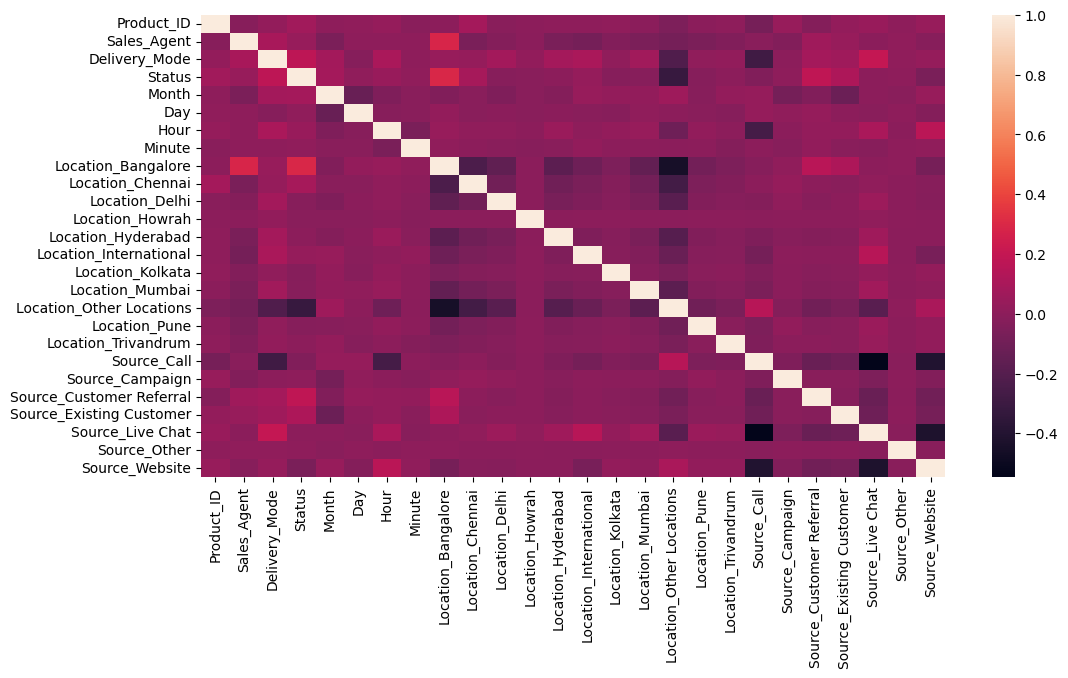

In [109]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr()),
plt.show()

In [110]:
data.columns

Index(['Product_ID', 'Sales_Agent', 'Delivery_Mode', 'Status', 'Month', 'Day',
       'Hour', 'Minute', 'Location_Bangalore', 'Location_Chennai',
       'Location_Delhi', 'Location_Howrah', 'Location_Hyderabad',
       'Location_International', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Other Locations', 'Location_Pune', 'Location_Trivandrum',
       'Source_Call', 'Source_Campaign', 'Source_Customer Referral',
       'Source_Existing Customer', 'Source_Live Chat', 'Source_Other',
       'Source_Website'],
      dtype='object')

### Splitting the data

In [111]:
X = data.drop('Status', axis=1)
y = data['Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNeighborsClassifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(x_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(x_test)

# Evaluate the model
print("logistic regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

logistic regression
Accuracy: 0.706199460916442

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78      1422
           1       0.61      0.54      0.57       804

    accuracy                           0.71      2226
   macro avg       0.68      0.67      0.67      2226
weighted avg       0.70      0.71      0.70      2226


Confusion Matrix:
 [[1140  282]
 [ 372  432]]


### KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(x_test)

# Evaluate the model
print("K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors (KNN)
Accuracy: 0.6895777178796046

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1422
           1       0.57      0.55      0.56       804

    accuracy                           0.69      2226
   macro avg       0.66      0.66      0.66      2226
weighted avg       0.69      0.69      0.69      2226


Confusion Matrix:
 [[1095  327]
 [ 364  440]]


### Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the GaussianNB model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(x_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(x_test)

# Evaluate the model
print("Naive Bayes (GaussianNB)")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes (GaussianNB)
Accuracy: 0.6702605570530099

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.93      0.78      1422
           1       0.63      0.22      0.32       804

    accuracy                           0.67      2226
   macro avg       0.65      0.57      0.55      2226
weighted avg       0.66      0.67      0.62      2226


Confusion Matrix:
 [[1318  104]
 [ 630  174]]


### SVC

In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

svc_model = SVC(probability =True)
svc_model.fit(x_train, y_train)

# Make predictions
y_pred = svc_model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6891284815813118

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      1422
           1       0.59      0.46      0.52       804

    accuracy                           0.69      2226
   macro avg       0.66      0.64      0.64      2226
weighted avg       0.68      0.69      0.68      2226



### Decision Tree 

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(x_test)

# Evaluate the model
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.6477987421383647

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1422
           1       0.51      0.56      0.53       804

    accuracy                           0.65      2226
   macro avg       0.62      0.63      0.63      2226
weighted avg       0.65      0.65      0.65      2226


Confusion Matrix:
 [[995 427]
 [357 447]]


### Random Forest 

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier()

#Train the model
rf_classifier.fit(x_train, y_train)

# Make Predictions
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7147349505840072

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1422
           1       0.62      0.54      0.58       804

    accuracy                           0.71      2226
   macro avg       0.69      0.68      0.68      2226
weighted avg       0.71      0.71      0.71      2226


Confusion Matrix:
 [[1160  262]
 [ 373  431]]


### Gradient Boosting 

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(x_test)

# Evaluate the model
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier
Accuracy: 0.7300089847259659

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1422
           1       0.65      0.54      0.59       804

    accuracy                           0.73      2226
   macro avg       0.71      0.69      0.69      2226
weighted avg       0.72      0.73      0.72      2226


Confusion Matrix:
 [[1191  231]
 [ 370  434]]


### XG Boosting

In [119]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(x_test)

# Evaluate the model
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Gradient Boosting Classifier
Accuracy: 0.7057502246181492

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1422
           1       0.60      0.57      0.58       804

    accuracy                           0.71      2226
   macro avg       0.68      0.68      0.68      2226
weighted avg       0.70      0.71      0.70      2226


Confusion Matrix:
 [[1112  310]
 [ 345  459]]


# Results

### Out of all the following classification algorithm Gradient boosting is giving highest accuracy of 73%

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(x_test)

# Evaluate the model
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier
Accuracy: 0.7300089847259659

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1422
           1       0.65      0.54      0.59       804

    accuracy                           0.73      2226
   macro avg       0.71      0.69      0.69      2226
weighted avg       0.72      0.73      0.72      2226


Confusion Matrix:
 [[1191  231]
 [ 370  434]]


In [123]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 10],  
    'min_samples_split': [2, 5, 10], 
    'subsample': [0.8, 0.9, 1.0], 
    'loss': ['log_loss', 'exponential'] 
}

gb_classifier = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_classifier,
    param_distributions=param_grid,
    n_iter=20, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(x_train, y_train)
print("Best hyperparameters found: ", random_search.best_params_)
best_gb_model = random_search.best_estimator_

# Evaluate the model
y_pred = best_gb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the tuned Gradient Boosting model: ", accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found:  {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1}
Accuracy of the tuned Gradient Boosting model:  0.7250673854447439


### Verifying Results

In [127]:
input_columns = [
    'Product_ID', 'Sales_Agent', 'Delivery_Mode', 'Month', 'Day', 'Hour', 'Minute',
    'Location_Bangalore', 'Location_Chennai', 'Location_Delhi', 'Location_Howrah',
    'Location_Hyderabad', 'Location_International', 'Location_Kolkata', 'Location_Mumbai',
    'Location_Other Locations', 'Location_Pune', 'Location_Trivandrum',
    'Source_Call', 'Source_Campaign', 'Source_Customer Referral',
    'Source_Existing Customer', 'Source_Live Chat', 'Source_Other',
    'Source_Website'
]

status_mapping = {0: "Low Potential '0'", 1: "High Potential '1'"}

print("\nEnter the following values for prediction:")
custom_input = []

for col in input_columns:
    try:
        value = input(f"Enter value for {col}: ")
        if value.isnumeric() or (value.replace('.', '', 1).isdigit() and '.' in value):
            value = float(value)
        elif value in ['0', '1']: 
            value = int(value)
        custom_input.append(value)
    except ValueError:
        print(f"Invalid input for {col}. Please enter a valid value.")
        break

custom_input = [custom_input]

try:
    
    gb_classifier.fit(x_train, y_train)  
    custom_prediction = gb_classifier.predict(custom_input)
    predicted_status = custom_prediction[0]

    readable_status = status_mapping.get(predicted_status, "Unknown")
    print(f"\nThe predicted status is: {readable_status} ")

except Exception as e:
    print(f"\nAn error occurred during prediction: {e}")



Enter the following values for prediction:


Enter value for Product_ID:  18
Enter value for Sales_Agent:  1
Enter value for Delivery_Mode:  0
Enter value for Month:  11
Enter value for Day:  14
Enter value for Hour:  10
Enter value for Minute:  5
Enter value for Location_Bangalore:  0
Enter value for Location_Chennai:  0
Enter value for Location_Delhi:  0
Enter value for Location_Howrah:  0
Enter value for Location_Hyderabad:  0
Enter value for Location_International:  0
Enter value for Location_Kolkata:  0
Enter value for Location_Mumbai:  0
Enter value for Location_Other Locations:  1
Enter value for Location_Pune:  0
Enter value for Location_Trivandrum:  0
Enter value for Source_Call:  0
Enter value for Source_Campaign:  0
Enter value for Source_Customer Referral:  0
Enter value for Source_Existing Customer:  0
Enter value for Source_Live Chat:  0
Enter value for Source_Other:  0
Enter value for Source_Website:  1



The predicted status is: Low Potential '0' 


## Overview 

Objective:
To build and evaluate machine learning models that predict lead categories (High Potential, Low Potential) 

Dataset Size: 7422 rows × 9 columns
Target Variable: Status

Data Preprocessing Steps:
Handled Missing values,
Droped Duplicates 

Basic Feature Engineering:
Extracted columns like Day, Month, Hour and Minute,
Grouped values in columns,
handled outliers

Feature Engineering:
Applied mapping,
applied OHE,
applied scaler to numerical columns 

EDA:
univariate, bivariate and correlation 

Splitting the dataset into training and testing sets
Applying different algorithm 
Fitting and predict the model
Evaluating the result
applied hyperparamter tuning



## Model Comparison Report 

In [ ]:
AllAccuracyOfTheModel = {
    'Logistic Regression' : 70.61,
    'KNN':68.95,
    'naive bayes' : 67.02,
    'support vector classifier' : 68.91,
    'Decision Tree':64.77,
    'Random Forest':70.21,    
    'gradient boosting classifier':73,
    'XGB Classifier' : 70.57
    
}
keys = AllAccuracyOfTheModel.keys()
values = AllAccuracyOfTheModel.values()

plt.figure(figsize=(8, 6))
bars = plt.bar(keys, values, color='lightblue', edgecolor='black')  

plt.xlabel('Accuracy of all the models')
plt.ylabel('% Age of the accuracy of the models')
plt.title('Comparison of models')
plt.xticks(rotation=45, fontsize=7)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.2, f'{value}%', ha='center', va='bottom')

plt.show()

## Report on challenges faced 

Several columns had missing values that needed to be handled.

Grouping the values in certain columns.

Extracting features.

Handling Categorical Variables.

Hyperparameter tuning